In [1]:
import preprocess_words as pre
from importlib import reload
reload(pre)
import pandas as pd
import numpy as np

In [2]:
csv_reviews, names, csv_files = pre.getReviews ("Raw_Scraped_Data/*.csv", 
                                            'Processed_Data/all_reviews.csv',
                                               'Raw_Scraped_Data/')

In [3]:
csv_reviews[1].head()

BOHEMIAN_Gaslight
0  So I live relatively close now, and an update ...
1  Roasted: came here because I couldn't drink th...
2  Gaslight - the coffee shop designed for the ev...
3  It's good coffee but it's a little bit overpri...
4  Hands down one of my favorite coffee shops, ev...

In [4]:
names[:5]

['BOHEMIAN_gallery',
 'BOHEMIAN_Gaslight',
 'BOHEMIAN_Intelligentsia',
 'BOHEMIAN_Ipsento',
 'BOHEMIAN_volume']

In [5]:
csv_files[:5]

['Raw_Scraped_Data/BOHEMIAN_gallery.csv',
 'Raw_Scraped_Data/BOHEMIAN_Gaslight.csv',
 'Raw_Scraped_Data/BOHEMIAN_Intelligentsia.csv',
 'Raw_Scraped_Data/BOHEMIAN_Ipsento.csv',
 'Raw_Scraped_Data/BOHEMIAN_volumes.csv']

In [6]:
word_list = pre.createWordList (csv_reviews, names, remove_punct=False)
word_list[1][:500]

"so i live relatively close now, and an update is due. \xa0while it's still fairly difficult to get a seat, i dig this spot. \xa0the coffee is good, the food is good (better options then most shops), and they recently upgraded many of their tables and chairs. \xa0internet never seems to be an issue here, and the staff has grown on me (for the most part). \xa0they also finally added some curtains so if you are sitting by the windows in the afternoon you aren't constantly blinded.i give them 4.5 stars (subtrac"

In [7]:
punct_word_list = pre.createWordList (csv_reviews, names, remove_punct=False)
punct_word_list[1][:500]

"so i live relatively close now, and an update is due. \xa0while it's still fairly difficult to get a seat, i dig this spot. \xa0the coffee is good, the food is good (better options then most shops), and they recently upgraded many of their tables and chairs. \xa0internet never seems to be an issue here, and the staff has grown on me (for the most part). \xa0they also finally added some curtains so if you are sitting by the windows in the afternoon you aren't constantly blinded.i give them 4.5 stars (subtrac"

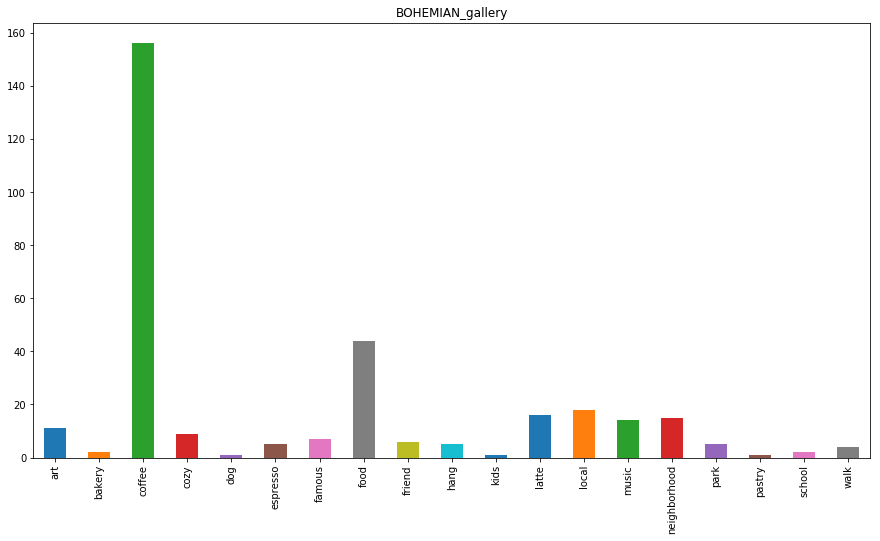

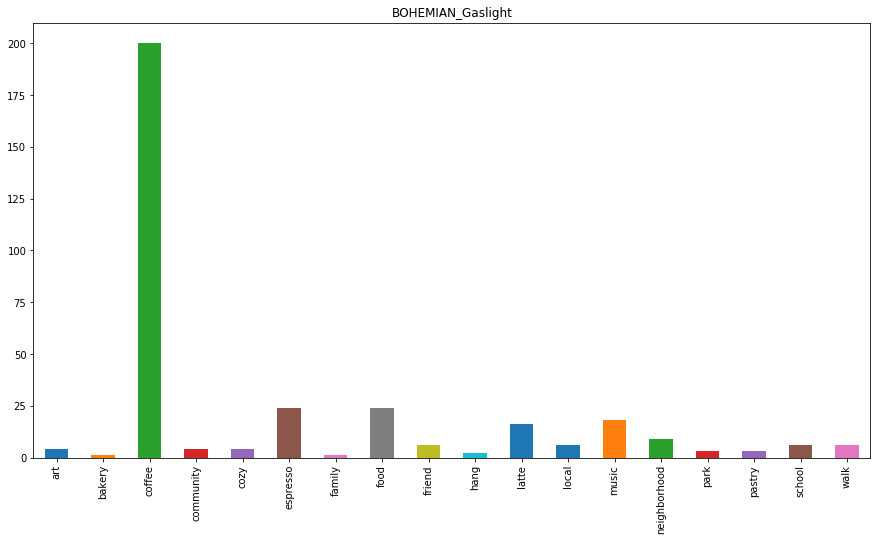

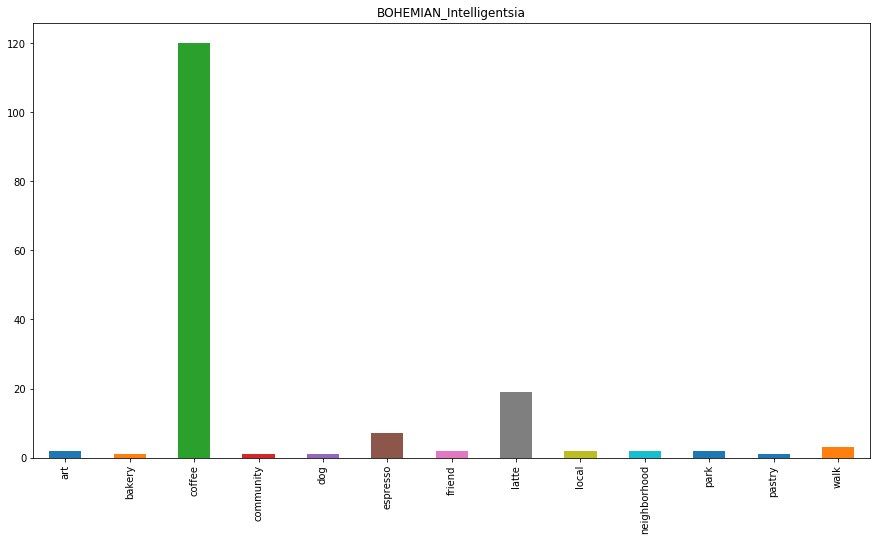

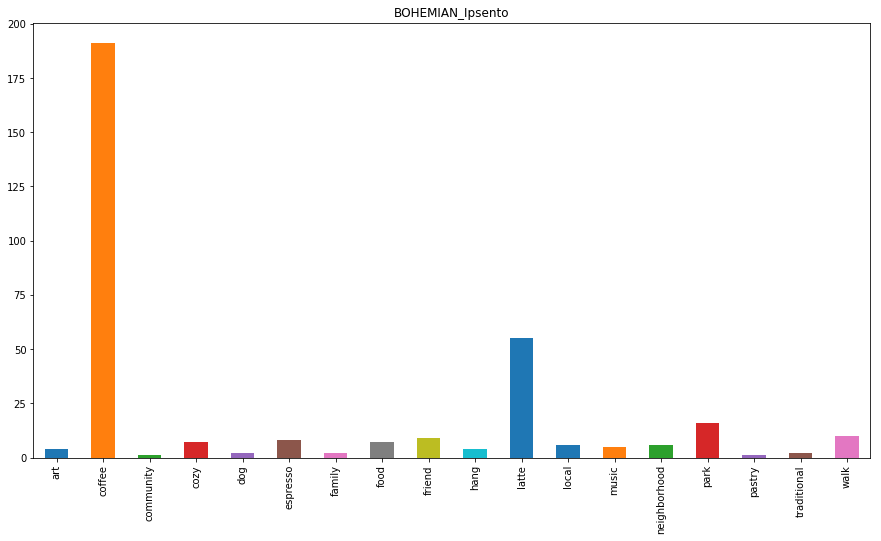

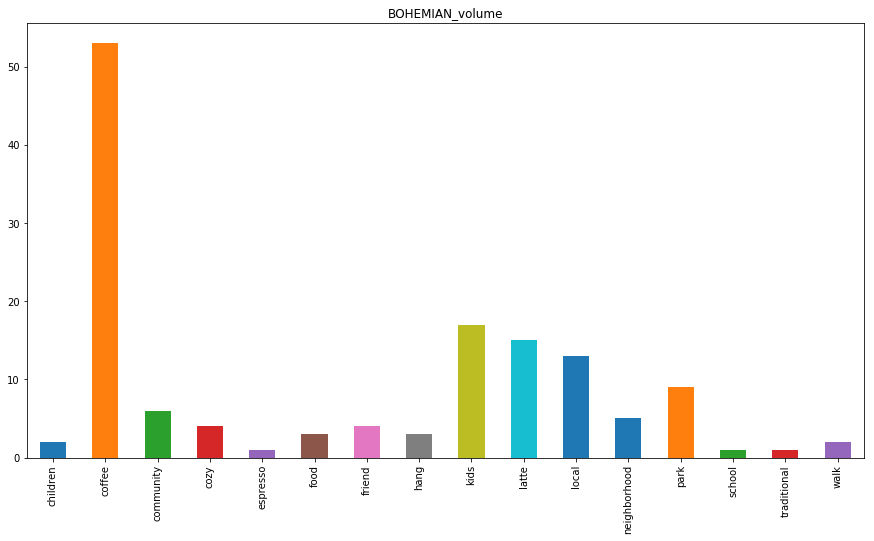

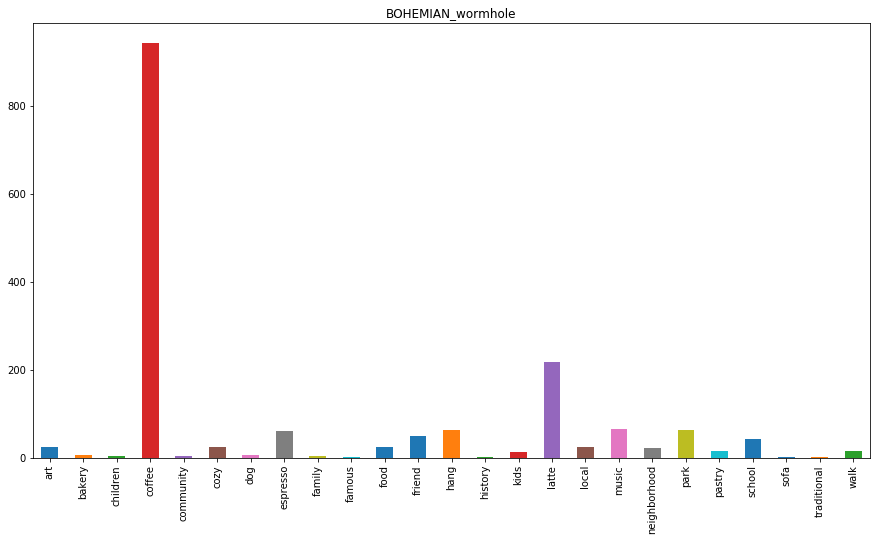

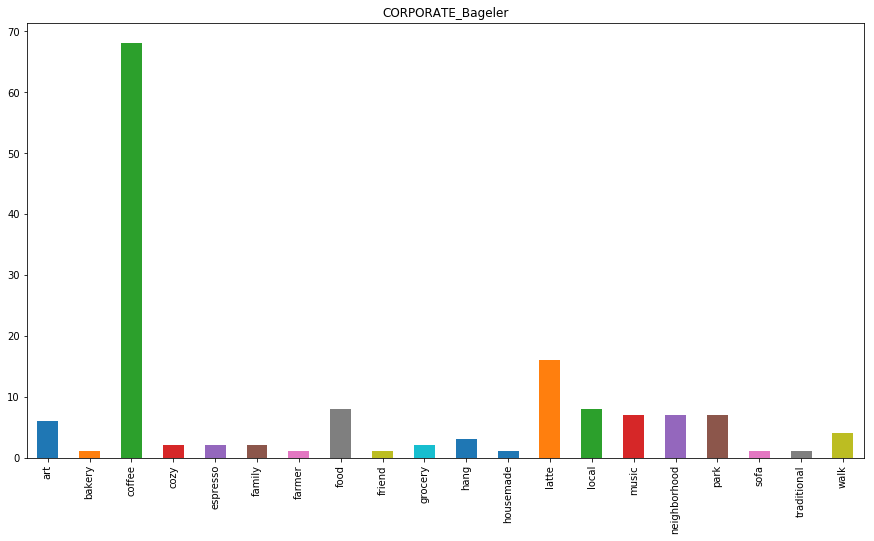

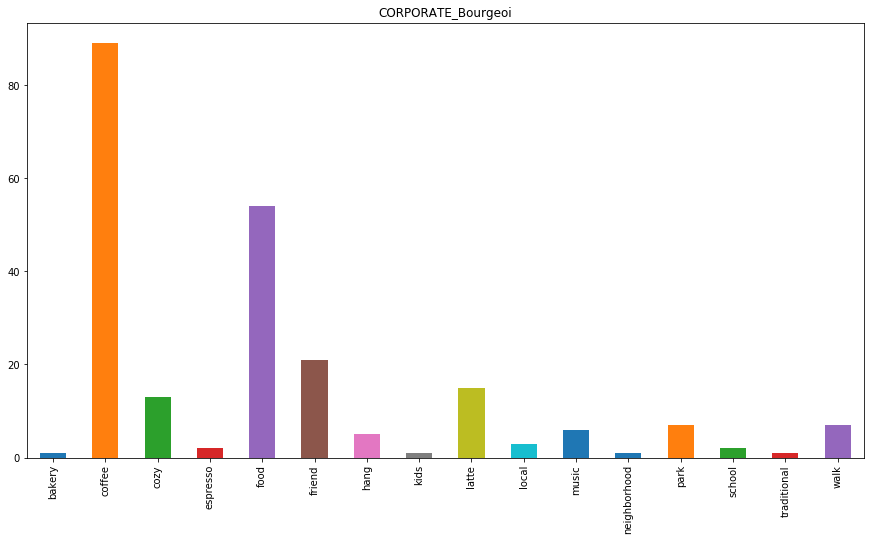

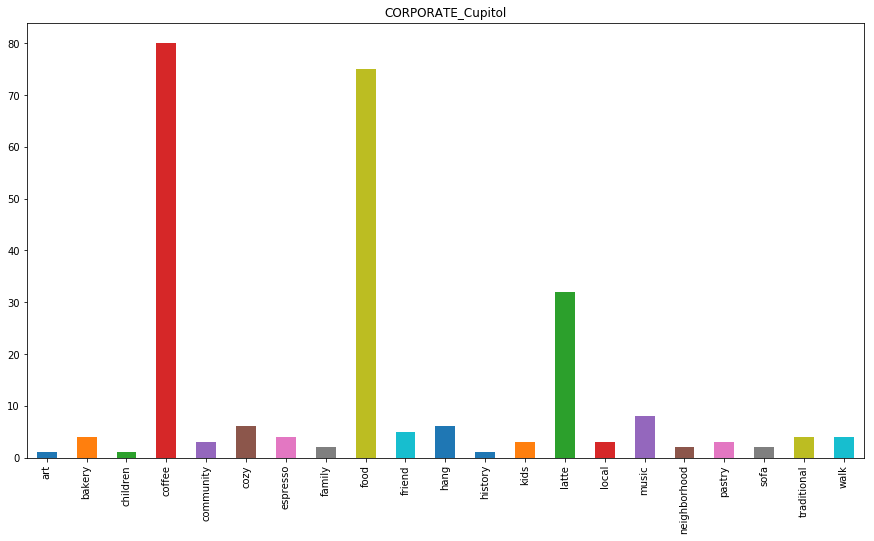

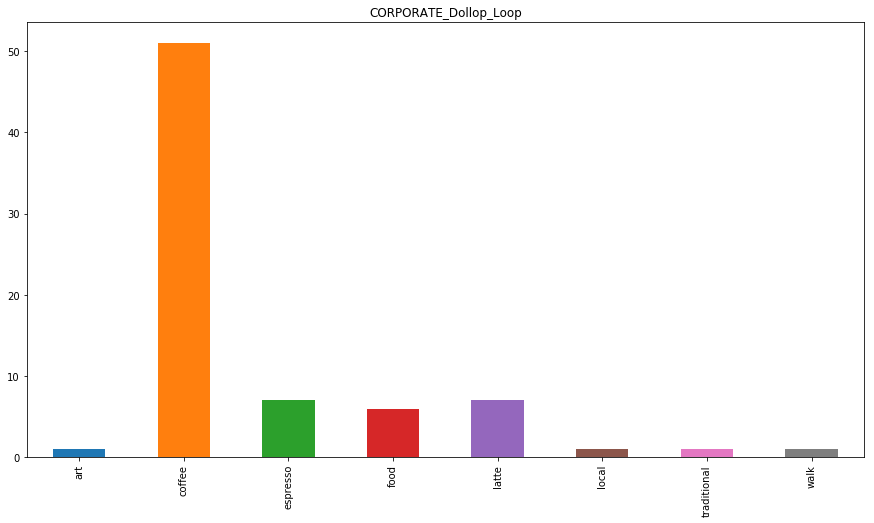

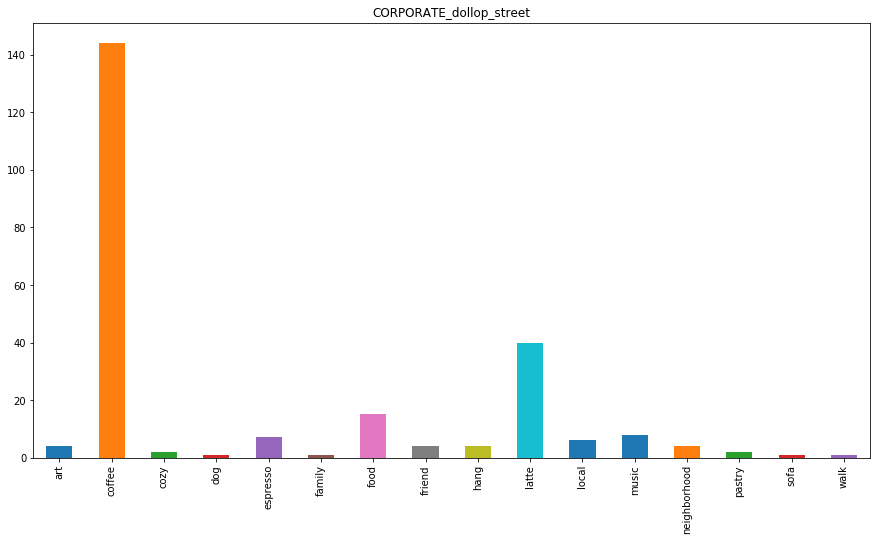

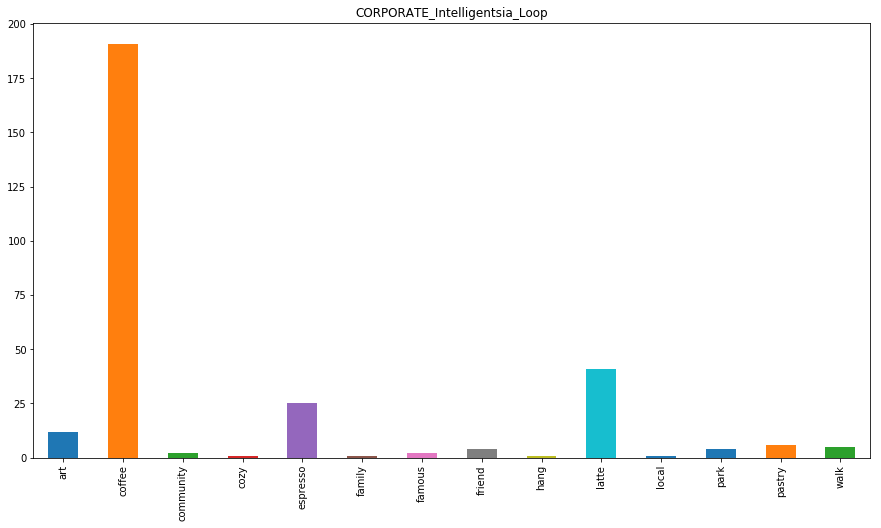

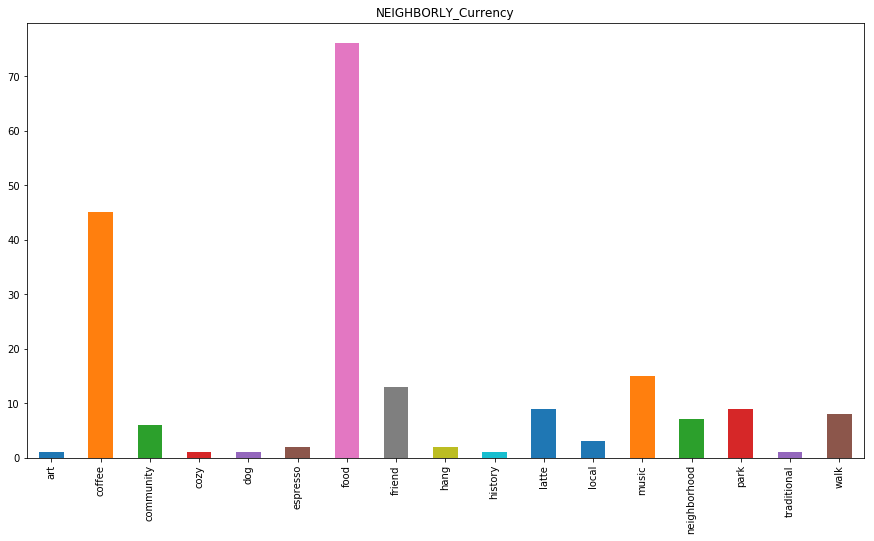

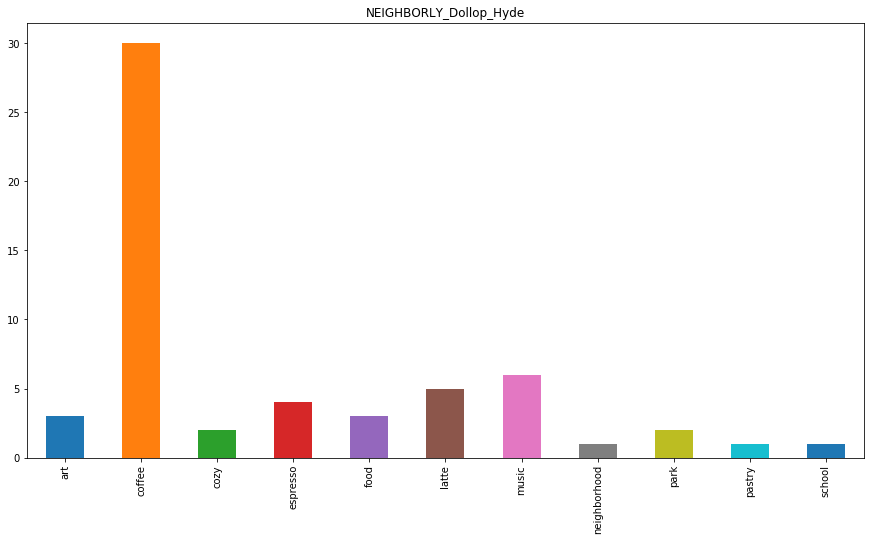

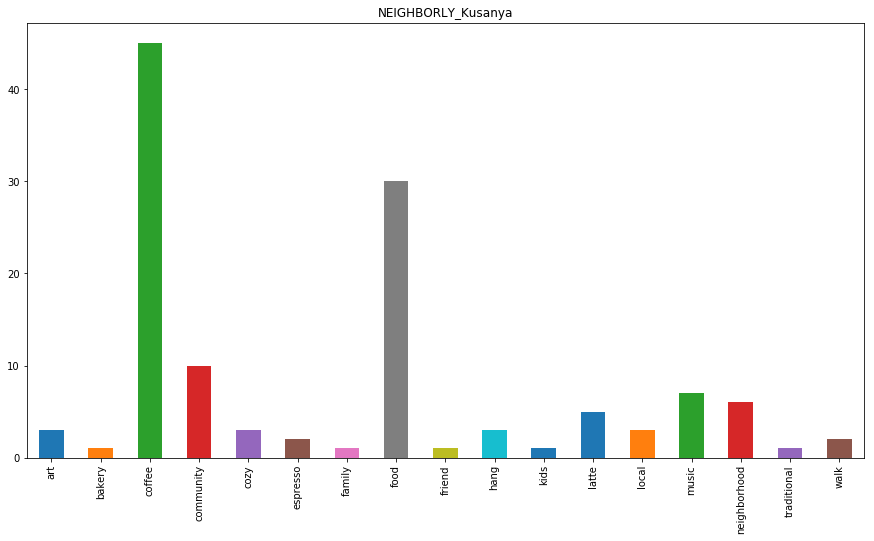

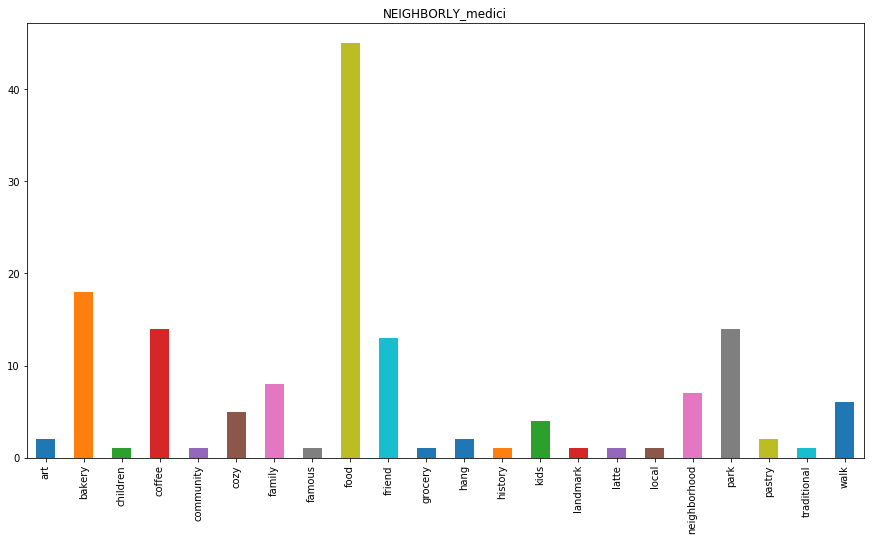

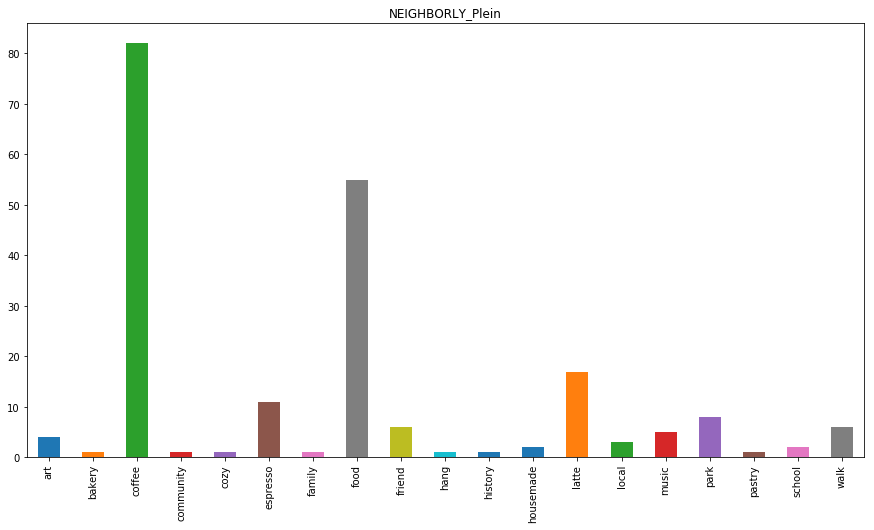

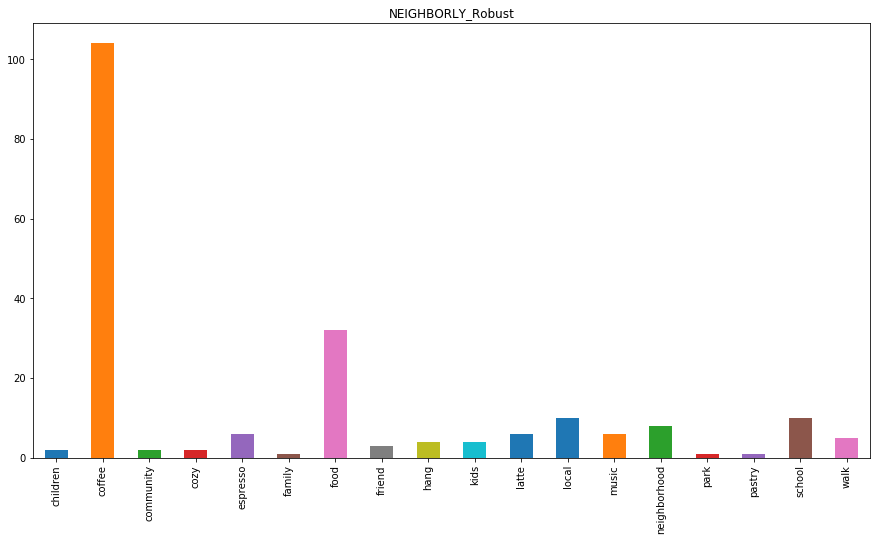

In [8]:
csv_counter = pre.findWordFreq (word_list, names)
pre.createplot(csv_counter)

In [9]:
csv_counter

{'BOHEMIAN_Gaslight': {'art': 4,
  'bakery': 1,
  'coffee': 200,
  'community': 4,
  'cozy': 4,
  'espresso': 24,
  'family': 1,
  'food': 24,
  'friend': 6,
  'hang': 2,
  'latte': 16,
  'local': 6,
  'music': 18,
  'neighborhood': 9,
  'park': 3,
  'pastry': 3,
  'school': 6,
  'walk': 6},
 'BOHEMIAN_Intelligentsia': {'art': 2,
  'bakery': 1,
  'coffee': 120,
  'community': 1,
  'dog': 1,
  'espresso': 7,
  'friend': 2,
  'latte': 19,
  'local': 2,
  'neighborhood': 2,
  'park': 2,
  'pastry': 1,
  'walk': 3},
 'BOHEMIAN_Ipsento': {'art': 4,
  'coffee': 191,
  'community': 1,
  'cozy': 7,
  'dog': 2,
  'espresso': 8,
  'family': 2,
  'food': 7,
  'friend': 9,
  'hang': 4,
  'latte': 55,
  'local': 6,
  'music': 5,
  'neighborhood': 6,
  'park': 16,
  'pastry': 1,
  'traditional': 2,
  'walk': 10},
 'BOHEMIAN_gallery': {'art': 11,
  'bakery': 2,
  'coffee': 156,
  'cozy': 9,
  'dog': 1,
  'espresso': 5,
  'famous': 7,
  'food': 44,
  'friend': 6,
  'hang': 5,
  'kids': 1,
  'latte': 1

In [10]:
groups, groupReviews = pre.GroupByLocation (names, word_list)

In [11]:
groups

['BOHEMIAN', 'NEIGHBORLY', 'CORPORATE']

In [12]:
#groupReviews
groupWordList = pre.findWordFreq (groupReviews, groups, threshold=30)

In [13]:
groupWordList

{'BOHEMIAN': {'art': 44,
  'bakery': 9,
  'children': 5,
  'coffee': 1662,
  'community': 16,
  'cozy': 49,
  'dog': 10,
  'espresso': 105,
  'family': 6,
  'famous': 9,
  'food': 103,
  'friend': 76,
  'hang': 77,
  'history': 2,
  'kids': 30,
  'latte': 338,
  'local': 68,
  'music': 103,
  'neighborhood': 58,
  'park': 97,
  'pastry': 21,
  'school': 52,
  'sofa': 2,
  'traditional': 5,
  'walk': 39},
 'CORPORATE': {'art': 24,
  'bakery': 6,
  'children': 1,
  'coffee': 623,
  'community': 5,
  'cozy': 24,
  'dog': 1,
  'espresso': 47,
  'family': 6,
  'famous': 2,
  'farmer': 1,
  'food': 158,
  'friend': 35,
  'grocery': 2,
  'hang': 19,
  'history': 1,
  'housemade': 1,
  'kids': 4,
  'latte': 151,
  'local': 22,
  'music': 29,
  'neighborhood': 14,
  'park': 18,
  'pastry': 11,
  'school': 2,
  'sofa': 4,
  'traditional': 7,
  'walk': 22},
 'NEIGHBORLY': {'art': 13,
  'bakery': 20,
  'children': 3,
  'coffee': 320,
  'community': 20,
  'cozy': 14,
  'dog': 1,
  'espresso': 25,
 

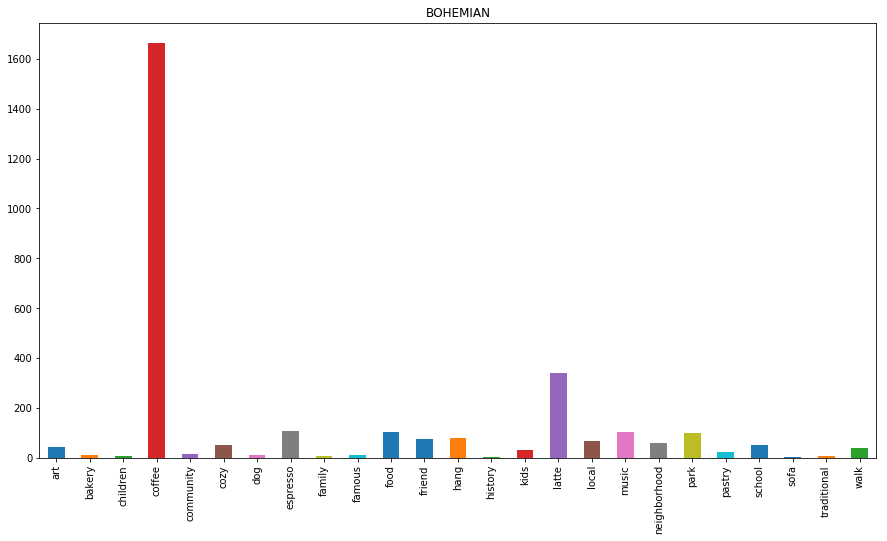

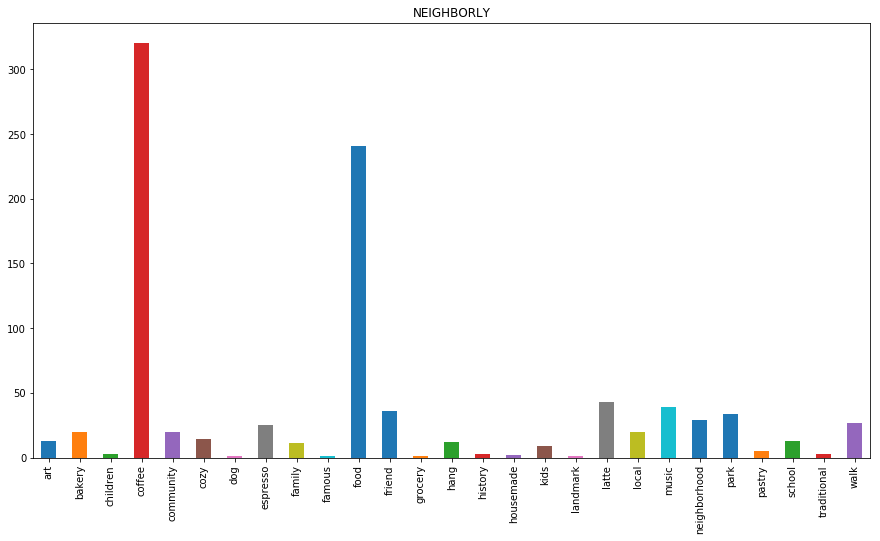

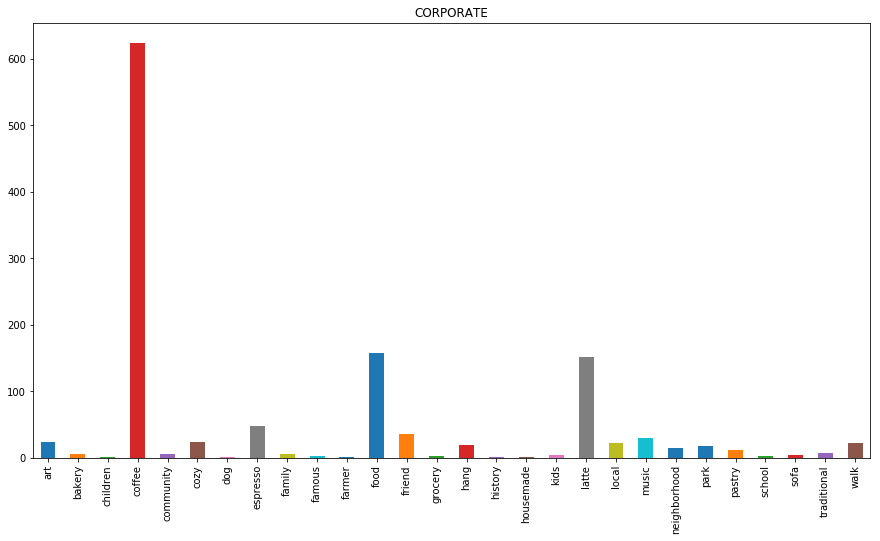

In [14]:
pre.createplot (groupWordList)

In [15]:
#pre.punct_groupReviews[1][:500]
pre.groups_to_json (groups, groupReviews, 'Processed_Data/Grouped_Reviews')